In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [63]:
import warnings

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [38]:
# https://gist.github.com/AdamSpannbauer/c99c366b0c7d5b6c4920a46c32d738e5
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

In [39]:
data_url = "https://docs.google.com/spreadsheets/d/1RJrLftlRnj6gmrYewqxykVKSyl7aV-Ktd3sUNQILidM/export?format=csv"
startup = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In [40]:
startup.shape

(50, 5)

<IPython.core.display.Javascript object>

In [41]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<IPython.core.display.Javascript object>

* Do we have an even distribution of states?

* Create a pair plot with all of the data, what do you see?

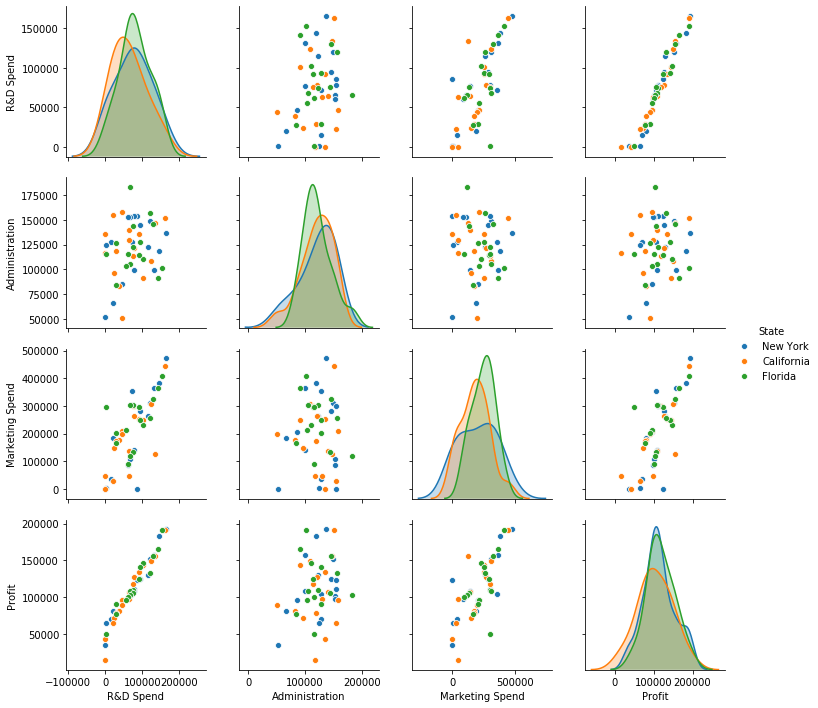

<IPython.core.display.Javascript object>

* Create a train test split stratified by state

<IPython.core.display.Javascript object>

* One hot encode

In [48]:
one_hot_cols = ["State"]
other_cols = [c for c in X.columns if c not in one_hot_cols]

ct = ColumnTransformer(
    #   Format
    #   [("name of step", what_to_do(), [what columns to do it to])]
    [("one hot encode", OneHotEncoder(drop="first"), one_hot_cols)],
    remainder="passthrough",
)

ct.fit(X_train)

# This is not the flexible and definitely not the most
# readable way to get column names, a function would be better
encoded_names = ct.transformers_[0][1].get_feature_names()
encoded_names = list(encoded_names)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

X_train = pd.DataFrame(X_train, columns=encoded_names + other_cols, index=y_train.index)
X_test = pd.DataFrame(X_test, columns=encoded_names + other_cols, index=y_test.index)

<IPython.core.display.Javascript object>

* Check for multicollinearity with VIF

* Build a model using statsmodels and display the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.07e-21
Time:                        09:52:42   Log-Likelihood:                -420.68
No. Observations:                  40   AIC:                             853.4
Df Residuals:                      34   BIC:                             863.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.905e+04   7985.346      6.142      0.000    3.28e+04    6.53e+04
x0_Florida        450.2065   3849.502      0.117      0.908   -7372.923    8273.335
x0_New York      -180.1938   3766.997     -0.048      0.962   -7835.653    7475.266
R&D Spend           0.8110      0.052     15.500      0.000       0.705       0.917
Administration     -0.0436      0.062     -0.699      0.489      -0.170       0.083
Marketing Spend     0.0371      0.019      1.946      0.060      -0.002       0.076
==============================================================================
Omnibus:                       11.767   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.712
Skew:                          -0.980   Prob(JB):                      0.00174
Kurtosis:                       4.945   Cond. No.                     1.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

* Check the normality of residuals assumption with a qqplot

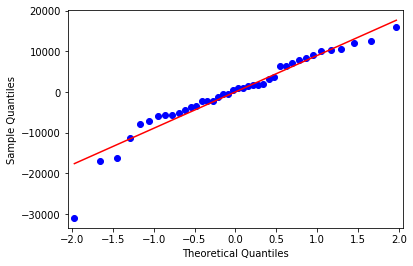

<IPython.core.display.Javascript object>

* Check the homoscedasticity assumption with `statsmodels`

In [59]:
_, _, _, p = _____
print(f"Do we reject the null hypothesis of homoscedasticity? {p < 0.05} (p={p:.4f})")

Do we reject the null hypothesis of homoscedasticity? False (p=0.0672)


<IPython.core.display.Javascript object>

* Make a plot of actuals vs predicted

* Calculate MAE, MAPE, MSE, & RMSE

In [62]:
errors = y_test - y_pred
abs_errors = errors.abs()

mae = np.mean(abs_errors)
mape = (abs_errors / y_test).mean()

mse = (errors ** 2).mean()
rmse = np.sqrt(mse)

print(f"mae {mae:.2f}")
print(f"mse {mse:.2f}")
print(f"rmse {rmse:.2f}")
print(f"mape {mape * 100:.2f}%")

mae 7376.85
mse 85247469.44
rmse 9232.96
mape 8.00%


<IPython.core.display.Javascript object>

Let's use `sklearn`'s `cross_val_score` to see a more 'stable' picture of your model's accuracy
* Use `cross_val_score` to calculate $R^2$

In [65]:
model = LinearRegression()


<IPython.core.display.Javascript object>

* Use cross_val_score to calculate mean absolute error